<a href="https://colab.research.google.com/github/h0227mori-coder/welcome-to-docker/blob/main/Exercise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#修了課題①　Titanic

利用するデータセット：タイタニック号の搭乗者データ

合格基準：テストデータに対して正解率80%以上

データセットの中身

*   pclass： 旅客クラス（1＝1等、2＝2等、3＝3等）。(裕福さの目安)
*   name： 乗客の名前
*   sex： 性別（male＝男性、female＝女性）
*   age： 年齢。一部の乳児は小数値
*   sibsp： タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数
*   parch： タイタニック号に同乗している親（Parents）や子供（Children）の数
*   ticket： チケット番号
*   fare： 旅客運賃
*   cabin： 客室番号
*   embarked： 出港地（C＝Cherbourg：シェルブール、Q＝Queenstown：クイーンズタウン、S＝Southampton：サウサンプトン）
*   boat： 救命ボート番号
*   body： 遺体収容時の識別番号
*   home.dest： 自宅または目的地



# データのダウンロード
※変更しない様、お願いいたします。

In [1]:
import pandas as pd
import numpy as np

In [2]:

# 学習用のデータのダウンロード
!wget 'https://drive.google.com/uc?export=download&id=1-12Pg5IsjNAEbgk7G4a2WqFaOhpYmbyJ' -O titanic_train.csv
# 検証用のデータのダウンロード
!wget 'https://drive.google.com/uc?export=download&id=1jmzmYNPRWUGLcHeqhcwKTGlb_d2Rzn4Y' -O titanic_validation.csv

--2025-11-23 22:04:31--  https://drive.google.com/uc?export=download&id=1-12Pg5IsjNAEbgk7G4a2WqFaOhpYmbyJ
Resolving drive.google.com (drive.google.com)... 172.253.117.100, 172.253.117.102, 172.253.117.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-12Pg5IsjNAEbgk7G4a2WqFaOhpYmbyJ&export=download [following]
--2025-11-23 22:04:32--  https://drive.usercontent.google.com/download?id=1-12Pg5IsjNAEbgk7G4a2WqFaOhpYmbyJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68821 (67K) [application/octet-stream]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  67.21K  --

In [3]:
# 変更しないようお願いいたします。
# 課題提出時に利用するデータのダウンロード
!wget 'https://drive.google.com/uc?export=download&id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ' -O titanic_test_x.csv

--2025-11-23 22:04:46--  https://drive.google.com/uc?export=download&id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ
Resolving drive.google.com (drive.google.com)... 172.253.117.100, 172.253.117.102, 172.253.117.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ&export=download [following]
--2025-11-23 22:04:46--  https://drive.usercontent.google.com/download?id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26481 (26K) [application/octet-stream]
Saving to: ‘titanic_test_x.csv’

titanic_test_x.csv  100%[===================>]  25.86K  -

In [4]:
# 学習用データ
train_df = pd.read_csv('titanic_train.csv', index_col=0)
display(train_df.head(3))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,0,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5,C132,C,?,45,?
1,3,0,"Hagland, Mr. Konrad Mathias Reiersen",male,?,1,0,65304,19.9667,?,S,?,?,?
2,3,0,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,?,S,?,?,?


In [5]:
# 検証用データ
val_df = pd.read_csv('titanic_validation.csv', index_col=0)
display(val_df.head(3))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
800,1,1,"Bishop, Mr. Dickinson H",male,25,1,0,11967,91.0792,B49,C,7,?,"Dowagiac, MI"
801,2,0,"Sweet, Mr. George Frederick",male,14,0,0,220845,65.0000,?,S,?,?,"Somerset / Bernardsville, NJ"
802,3,0,"Ibrahim Shawah, Mr. Yousseff",male,30,0,0,2685,7.2292,?,C,?,?,?


In [6]:
# 学習用データと検証用データの情報
# 欠損値がないようにみえるが、？で埋められているため処理が必要。
# objectデータは数値に変換する必要がある。
train_df = train_df.replace('?', np.nan)
val_df = val_df.replace('?', np.nan)
train_df.info()
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     800 non-null    int64 
 1   survived   800 non-null    int64 
 2   name       800 non-null    object
 3   sex        800 non-null    object
 4   age        630 non-null    object
 5   sibsp      800 non-null    int64 
 6   parch      800 non-null    int64 
 7   ticket     800 non-null    object
 8   fare       799 non-null    object
 9   cabin      175 non-null    object
 10  embarked   800 non-null    object
 11  boat       297 non-null    object
 12  body       73 non-null     object
 13  home.dest  447 non-null    object
dtypes: int64(4), object(10)
memory usage: 93.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 800 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     200 non-null    int64  
 1

In [7]:
# 課題提出時に利用するテストデータの読み込みと表示
X_test = pd.read_csv('titanic_test_x.csv', index_col=0)
X_test.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Rosenbaum, Miss. Edith Louise",female,33,0,0,PC 17613,27.7208,A11,C,11,?,"Paris, France"
1,3,"Nysveen, Mr. Johan Hansen",male,61,0,0,345364,6.2375,?,S,?,?,?
2,3,"Eklund, Mr. Hans Linus",male,16,0,0,347074,7.7750,?,S,?,?,"Karberg, Sweden Jerome Junction, AZ"


In [8]:
X_test = X_test.replace('?', np.nan)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     309 non-null    int64  
 1   name       309 non-null    object 
 2   sex        309 non-null    object 
 3   age        247 non-null    object 
 4   sibsp      309 non-null    int64  
 5   parch      309 non-null    int64  
 6   ticket     309 non-null    object 
 7   fare       309 non-null    float64
 8   cabin      67 non-null     object 
 9   embarked   308 non-null    object 
 10  boat       116 non-null    object 
 11  body       25 non-null     object 
 12  home.dest  189 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 33.8+ KB


#モデルの制作

In [ ]:
# ここからダウンロードされたデータに対してモデルを作成し、検証用データに対して予測結果を出力して下さい。

In [51]:
dataset = [train_df, val_df]

In [11]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.616162
1,2,0.453488
2,3,0.246512


In [12]:
train_df[["name", "survived"]].groupby(['name'], as_index=False).mean().sort_values(by='survived', ascending=False)

,name,survived
21,"Andersson, Miss. Erna Alexandra",1.0
24,"Andersson, Mr. August Edvard ('Wennerstrom')",1.0
794,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",1.0
752,"Watt, Mrs. James (Elizabeth 'Bessie' Inglis Mi...",1.0
753,"Webber, Miss. Susan",1.0
...,...,...
458,"McGowan, Miss. Katherine",0.0
459,"McKane, Mr. Peter David",0.0
460,"McNamee, Mr. Neal",0.0
461,"McNeill, Miss. Bridget",0.0


In [13]:
train_df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.707143
1,male,0.207692


In [14]:
train_df[["age", "survived"]].groupby(['age'], as_index=False).mean().sort_values(by='survived', ascending=False)

,age,survived
1,0.4167,1.0
2,0.6667,1.0
5,0.9167,1.0
4,0.8333,1.0
6,1,1.0
...,...,...
76,61,0.0
85,71,0.0
84,70.5,0.0
83,70,0.0


In [15]:
train_df[["fare", "survived"]].groupby(['fare'], as_index=False).mean().sort_values(by='survived', ascending=False)

,fare,survived
5,106.425,1.0
7,11.2417,1.0
10,113.275,1.0
11,12,1.0
9,110.8833,1.0
...,...,...
225,9.325,0.0
232,9.8375,0.0
231,9.825,0.0
230,9.6875,0.0


In [16]:
train_df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.505376
2,2,0.380952
0,0,0.359066
3,3,0.166667
4,4,0.133333
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
1,1,0.554455
3,3,0.500000
2,2,0.447761
0,0,0.350081
4,4,0.333333
5,5,0.000000
6,6,0.000000
7,9,0.000000


In [18]:
train_df[["ticket", "survived"]].groupby(['ticket'], as_index=False).mean().sort_values(by='survived', ascending=False)

,ticket,survived
631,W./C. 14266,1.0
0,110152,1.0
629,W./C. 14258,1.0
2,110564,1.0
3,111163,1.0
...,...,...
345,349229,0.0
344,349228,0.0
343,349226,0.0
342,349224,0.0


In [19]:
train_df[["cabin", "survived"]].groupby(['cabin'], as_index=False).mean().sort_values(by='survived', ascending=False)

,cabin,survived
1,A16,1.0
10,A6,1.0
6,A26,1.0
4,A20,1.0
129,F4,1.0
...,...,...
118,E58,0.0
123,F,0.0
121,E77,0.0
128,F38,0.0


In [20]:
train_df[["embarked", "survived"]].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.572289
1,Q,0.376623
2,S,0.326750


In [21]:
train_df[["boat", "survived"]].groupby(['boat'], as_index=False).mean().sort_values(by='survived', ascending=False)

,boat,survived
0,1,1.000000
1,10,1.000000
2,11,1.000000
3,12,1.000000
4,13,1.000000
5,13 15,1.000000
6,13 15 B,1.000000
8,15,1.000000
9,15 16,1.000000
17,8,1.000000


In [22]:
train_df[["body", "survived"]].groupby(['body'], as_index=False).mean().sort_values(by='survived', ascending=False)

,body,survived
0,1,0.0
1,103,0.0
2,109,0.0
3,110,0.0
4,124,0.0
...,...,...
68,89,0.0
69,9,0.0
70,96,0.0
71,97,0.0


In [23]:
train_df[["home.dest", "survived"]].groupby(['home.dest'], as_index=False).mean().sort_values(by='survived', ascending=False)

,home.dest,survived
270,"Zurich, Switzerland",1.0
268,"Worcester, England",1.0
1,"Aberdeen / Portland, OR",1.0
2,"Albany, NY",1.0
267,"Woodford County, KY",1.0
...,...,...
263,"Wiltshire, England Niagara Falls, NY",0.0
266,"Winnipeg, MN",0.0
4,"Asarum, Sweden Brooklyn, NY",0.0
3,"Altdorf, Switzerland",0.0


In [24]:
columns = ['pclass','name','sex','age','fare','sibsp','parch','ticket','cabin','embarked','boat','body','home.dest', ]

In [25]:
freq_port = train_df.embarked.dropna().mode()[0]

In [26]:
train_df['embarked'].fillna(freq_port, inplace=True)
val_df['embarked'].fillna(freq_port, inplace=True)

/tmp/ipython-input-707723275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['embarked'].fillna(freq_port, inplace=True)
/tmp/ipython-input-707723275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [27]:
for data in dataset:
  data['embarked'] = data['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [28]:
for data in dataset:
    data['sex'] = data['sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [29]:
X_train = train_df[['pclass','sex','embarked']]
y_train = train_df['survived']
X_val = val_df[['pclass','sex','embarked']]
y_val = val_df['survived']

In [30]:
def rmse(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    mini_batch = y.shape[0]
    t = t.astype(int)
    return np.sqrt(np.sum((y - t)**2) / mini_batch)

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

In [35]:
# 2層のニューラルネットワーク
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        # forward
        u1 = np.dot(x, W1) + b1
        z1 = sigmoid(u1)
        u2 = np.dot(z1, W2) + b2
        y = sigmoid(u2)

        return y

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return rmse(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.where(y >= 0.5, 1, 0)
        #y = np.argmax(y, axis=1)
        #t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 数値計算で勾配を求めると計算時間がかかるため、逆伝播法をはじめから実装する
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        u1 = np.dot(x, W1) + b1
        z1 = sigmoid(u1)
        u2 = np.dot(z1, W2) + b2
        y = sigmoid(u2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        du1 = np.dot(dy, W2.T)
        dz1 = deriv_sigmoid(u1) * du1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [38]:
network = TwoLayerNet(input_size=3, hidden_size=100, output_size=1)

In [39]:
epoch = 1000
train_size = X_train.shape[0]
mini_batch = 20
lr = 0.01

In [40]:
train_loss_list = []
train_acc_list = []
val_acc_list = []

iter_per_epoch = max(train_size / mini_batch, 1)

In [41]:
for i in range(epoch):
    batch_mask = np.random.choice(train_size, mini_batch)
    x_batch = np.array(X_train.iloc[batch_mask])
    y_batch = np.array(y_train.iloc[batch_mask])[..., np.newaxis]

    grad = network.gradient(x_batch, y_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]

    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(np.array(X_train), np.array(y_train)[..., np.newaxis])
        val_acc = network.accuracy(np.array(X_val), np.array(y_val)[..., np.newaxis])
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        print("train acc, val acc | " + str(train_acc) + ", " + str(val_acc))

train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615
train acc, val acc | 0.6175, 0.615


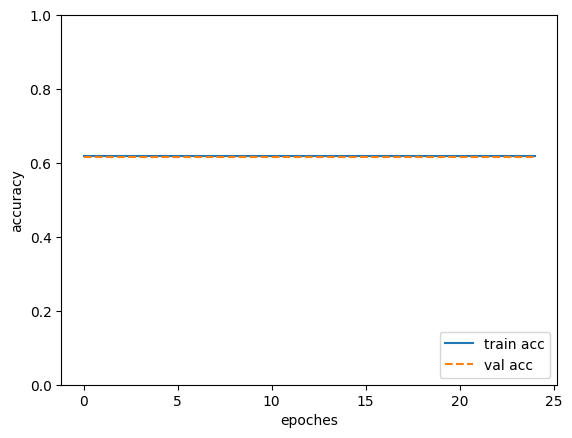

In [42]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, val_acc_list, label='val acc', linestyle='--')
plt.xlabel("epoches")
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [43]:
!wget 'https://drive.google.com/uc?export=download&id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ' -O titanic_test_x.csv

--2025-11-23 22:40:04--  https://drive.google.com/uc?export=download&id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ
Resolving drive.google.com (drive.google.com)... 172.253.117.102, 172.253.117.113, 172.253.117.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ&export=download [following]
--2025-11-23 22:40:04--  https://drive.usercontent.google.com/download?id=1-1KX2NQmwUOXAstOE7c2INC1rRMNABVZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26481 (26K) [application/octet-stream]
Saving to: ‘titanic_test_x.csv’

titanic_test_x.csv  100%[===================>]  25.86K  --.

In [44]:
X_test = pd.read_csv('titanic_test_x.csv', index_col=0)
X_test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Rosenbaum, Miss. Edith Louise",female,33,0,0,PC 17613,27.7208,A11,C,11,?,"Paris, France"
1,3,"Nysveen, Mr. Johan Hansen",male,61,0,0,345364,6.2375,?,S,?,?,?
2,3,"Eklund, Mr. Hans Linus",male,16,0,0,347074,7.7750,?,S,?,?,"Karberg, Sweden Jerome Junction, AZ"
3,3,"Khalil, Mr. Betros",male,?,1,0,2660,14.4542,?,C,?,?,?
4,1,"Bowen, Miss. Grace Scott",female,45,0,0,PC 17608,262.3750,?,C,4,?,"Cooperstown, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,3,"Flynn, Mr. John",male,?,0,0,368323,6.9500,?,Q,?,?,?
305,1,"Carrau, Mr. Jose Pedro",male,17,0,0,113059,47.1000,?,S,?,?,"Montevideo, Uruguay"
306,2,"Brown, Miss. Edith Eileen",female,15,0,2,29750,39.0000,?,S,14,?,"Cape Town, South Africa / Seattle, WA"
307,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,25.7000,C101,S,2,?,"New York, NY"


In [45]:
X_test = X_test.replace('?', np.nan)
X_test['embarked'].fillna(freq_port, inplace=True)
X_test['embarked'] = X_test['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_test['sex'] = X_test['sex'].map( {'female': 1, 'male': 0} ).astype(int)
X_test = X_test[['pclass','sex','embarked']]

/tmp/ipython-input-1387099393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['embarked'].fillna(freq_port, inplace=True)


In [46]:
y_pred = network.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred = pd.DataFrame(y_pred, columns=['survived'])
y_pred.to_csv('y_pred.csv')
y_pred

,survived
0,0
1,0
2,0
3,0
4,0
...,...
304,0
305,0
306,0
307,0


In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_val = round(logreg.score(X_val, y_val) * 100, 2)
print('学習精度:', acc_log)
print('検証精度:', acc_log_val)

Y_pred = logreg.predict(X_test)

学習精度: 76.12
検証精度: 80.5


In [48]:
# 提出形式見本
# 提出データの形、タイトル
# 309行、カラム名が「survived」になるようにする。
y_pred = pd.DataFrame(np.random.choice([0, 1], 309), columns=['survived']) # 答えの形

# 例）
# networkというモデルで予測値を出した場合
# y_pred = network.pred(X_test)
# y_pred = pd.DataFrame(y_pred, columns=['survived'])

# csv形式で提出する。
y_pred.to_csv('y_pred.csv')
y_pred

,survived
0,1
1,1
2,1
3,1
4,0
...,...
304,0
305,1
306,0
307,1


In [52]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=y_pred)

https://docs.google.com/spreadsheets/d/156-no7wyuNtlyl9EmUJb_V0QAhwm6Pf8Ftn2ERagR74/edit#gid=0


# 課題提出

# 新しいセクション

In [53]:
# 提出形式見本
# 提出データの形、タイトル
# 309行、カラム名が「survived」になるようにする。
y_pred = pd.DataFrame(np.random.choice([0, 1], 309), columns=['survived']) # 答えの形

# 例）
# networkというモデルで予測値を出した場合
# y_pred = network.pred(X_test)
# y_pred = pd.DataFrame(y_pred, columns=['survived'])

# csv形式で提出する。
y_pred.to_csv('y_pred.csv')
y_pred

,survived
0,1
1,1
2,1
3,0
4,0
...,...
304,1
305,0
306,0
307,1
